In [1]:
!pip install soccerdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.1 MB/s eta 0:00:00
  Created wheel for undetected-chromedriver: filename=undetected_chromedriver-3.5.5-py3-none-any.whl size=47047 sha256=1eb5cf2098a085b77b6f9b107b933d88b115a30a4a270d178fab9f52171479f3
  Stored in directory: /root/.cache/pip/wheels/5c/b9/03/4b6e38f019d6170e8c25df2e1e362d7bdf9ff4012df2dc85c0
Successfully built undetected-chromed

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[06/08/25 02:39:14] INFO     No custom team name replacements found. You can configure these in       ]8;id=729640;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=472860;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#91\91]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=516899;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=127495;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#197\197]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [4]:
fbref = sd.FBref(leagues="Big 5 European Leagues Combined", seasons=2425)
print(fbref.__doc__)

[06/08/25 02:39:19] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=297974;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=975166;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [5]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

[06/08/25 02:39:26] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=244517;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=593697;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born  \
                                                                          
league             season team    player                                  
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997   
                                  Bukayo Saka      ENG  FW,MF  22  2001   
                                  David Raya       ESP     GK  28  1995   
                                  Declan Rice      ENG     MF  25  1999   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   

                                                Playing Time               \
                                                          MP Starts   Min   
league             season team    player                                    
ENG-Premier League 2425   Arsenal Ben White               17     13  1198   
                                  Bukayo Saka             25     20  1729   
                                  David Raya              38     38  3420   
                                  Declan Rice             35     33  2825   
                                  Ethan Nwaneri           26     11   895   

                                                      Performance      ...  \
                                                  90s         Gls Ast  ...   
league             season team    player                               ...   
ENG-Premier League 2425   Arsenal Ben White      13.3           0   2  ...   
                                  Bukayo Saka    19.2           6  10  ...   
                                  David Raya     38.0           0   0  ...   
                                  Declan Rice    31.4           4   7  ...   
                                  Ethan Nwaneri   9.9           4   2  ...   

                                                Per 90 Minutes              \
                                                           Gls   Ast   G+A   
league             season team    player                                     
ENG-Premier League 2425   Arsenal Ben White                0.0  0.15  0.15   
                                  Bukayo Saka             0.31  0.52  0.83   
                                  David Raya               0.0   0.0   0.0   
                                  Declan Rice             0.13  0.22  0.35   
                                  Ethan Nwaneri            0.4   0.2   0.6   

                                                                          \
                                                 G-PK G+A-PK    xG   xAG   
league             season team    player                                   
ENG-Premier League 2425   Arsenal Ben White       0.0   0.15  0.03   0.1   
                                  Bukayo Saka    0.26   0.78  0.36   0.4   
                                  David Raya      0.0    0.0   0.0   0.0   
                                  Declan Rice    0.13   0.35  0.11  0.21   
                                  Ethan Nwaneri   0.4    0.6  0.12  0.12   

                                                                       
                                                xG+xAG  npxG npxG+xAG  
league             season team    player                               
ENG-Premier League 2425   Arsenal Ben White       0.14  0.03     0.14  
                                  Bukayo Saka     0.75  0.31     0.71  
                                  David Raya       0.0   0.0      0.0  
                                  Declan Rice     0.32  0.11     0.32  
                                  Ethan Nwaneri   0.24  0.12     0.24  

[5 rows x 33 columns]

In [6]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

  Playing Time         ... Per 90 Minutes                                 \
            MP Starts  ...            Gls   Ast   G+A  G-PK G+A-PK    xG   
0           17     13  ...            0.0  0.15  0.15   0.0   0.15  0.03   
1           25     20  ...           0.31  0.52  0.83  0.26   0.78  0.36   
2           38     38  ...            0.0   0.0   0.0   0.0    0.0   0.0   
3           35     33  ...           0.13  0.22  0.35  0.13   0.35  0.11   
4           26     11  ...            0.4   0.2   0.6   0.4    0.6  0.12   

                               
    xAG xG+xAG  npxG npxG+xAG  
0   0.1   0.14  0.03     0.14  
1   0.4   0.75  0.31     0.71  
2   0.0    0.0   0.0      0.0  
3  0.21   0.32  0.11     0.32  
4  0.12   0.24  0.12     0.24  

[5 rows x 37 columns]

In [7]:
player_season_misc = fbref.read_player_season_stats(stat_type="misc")
player_season_misc.head()

[06/08/25 02:39:42] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=369671;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=754991;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born   90s  \
                                                                                
league             season team    player                                        
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997  13.3   
                                  Bukayo Saka      ENG  FW,MF  22  2001  19.2   
                                  David Raya       ESP     GK  28  1995  38.0   
                                  Declan Rice      ENG     MF  25  1999  31.4   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   9.9   

                                                Performance                 \
                                                       CrdY CrdR 2CrdY Fls   
league             season team    player                                     
ENG-Premier League 2425   Arsenal Ben White               2    0     0  10   
                                  Bukayo Saka             3    0     0  15   
                                  David Raya              3    0     0   1   
                                  Declan Rice             7    1     1  21   
                                  Ethan Nwaneri           1    0     0   9   

                                                     ...                      \
                                                Fld  ...  Crs Int TklW PKwon   
league             season team    player             ...                       
ENG-Premier League 2425   Arsenal Ben White       5  ...   17  16   14     0   
                                  Bukayo Saka    39  ...  117   3   15     1   
                                  David Raya     10  ...    0   2    0     0   
                                  Declan Rice    16  ...  164  25   25     0   
                                  Ethan Nwaneri   5  ...   54   2    7     0   

                                                               Aerial Duels  \
                                                PKcon OG Recov          Won   
league             season team    player                                      
ENG-Premier League 2425   Arsenal Ben White         0  0    37           18   
                                  Bukayo Saka       0  0    70           10   
                                  David Raya        1  0    41           13   
                                  Declan Rice       0  0   156           37   
                                  Ethan Nwaneri     0  0    34            4   

                                                             
                                                Lost   Won%  
league             season team    player                     
ENG-Premier League 2425   Arsenal Ben White        9   66.7  
                                  Bukayo Saka     20   33.3  
                                  David Raya       0  100.0  
                                  Declan Rice     25   59.7  
                                  Ethan Nwaneri    8   33.3  

[5 rows x 21 columns]

In [8]:
player_season_misc = player_season_misc.reset_index()
print(player_season_misc.columns)
player_season_misc.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

    90s Performance  ...                                    Aerial Duels       \
               CrdY  ...  Crs Int TklW PKwon PKcon OG Recov          Won Lost   
0  13.3           2  ...   17  16   14     0     0  0    37           18    9   
1  19.2           3  ...  117   3   15     1     0  0    70           10   20   
2  38.0           3  ...    0   2    0     0     1  0    41           13    0   
3  31.4           7  ...  164  25   25     0     0  0   156           37   25   
4   9.9           1  ...   54   2    7     0     0  0    34            4    8   

          
    Won%  
0   66.7  
1   33.3  
2  100.0  
3   59.7  
4   33.3  

[5 rows x 25 columns]

In [9]:
player_season_passing = fbref.read_player_season_stats(stat_type="passing")
player_season_passing.head()

[06/08/25 02:39:51] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=92213;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=903206;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born   90s  \
                                                                                
league             season team    player                                        
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997  13.3   
                                  Bukayo Saka      ENG  FW,MF  22  2001  19.2   
                                  David Raya       ESP     GK  28  1995  38.0   
                                  Declan Rice      ENG     MF  25  1999  31.4   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   9.9   

                                                Total                      \
                                                  Cmp   Att  Cmp% TotDist   
league             season team    player                                    
ENG-Premier League 2425   Arsenal Ben White       580   692  83.8    9173   
                                  Bukayo Saka     552   731  75.5    8408   
                                  David Raya     1040  1413  73.6   24784   
                                  Declan Rice    1376  1650  83.4   23402   
                                  Ethan Nwaneri   342   425  80.5    4906   

                                                         ...  Long Ast  xAG  \
                                                PrgDist  ...  Cmp%            
league             season team    player                 ...                  
ENG-Premier League 2425   Arsenal Ben White        2998  ...  48.0   2  1.4   
                                  Bukayo Saka      2487  ...  48.9  10  7.6   
                                  David Raya      17222  ...  37.7   0  0.0   
                                  Declan Rice      6234  ...  48.8   7  6.6   
                                  Ethan Nwaneri    1216  ...  51.4   2  1.2   

                                                Expected        KP  1/3 PPA  \
                                                      xA A-xAG                
league             season team    player                                      
ENG-Premier League 2425   Arsenal Ben White          1.4   0.6  10   55  11   
                                  Bukayo Saka        7.8   2.4  58   15  38   
                                  David Raya         0.1   0.0   1   45   3   
                                  Declan Rice        5.6   0.4  59  137  35   
                                  Ethan Nwaneri      1.8   0.8  16   17  16   

                                                CrsPA PrgP  
                                                            
league             season team    player                    
ENG-Premier League 2425   Arsenal Ben White         2   59  
                                  Bukayo Saka      12   70  
                                  David Raya        0   14  
                                  Declan Rice       5  192  
                                  Ethan Nwaneri     6   33  

[5 rows x 28 columns]

In [10]:
player_season_passing = player_season_passing.reset_index()
print(player_season_passing.columns)
player_season_passing.head()

MultiIndex([(  'league',        ''),
            (  'season',        ''),
            (    'team',        ''),
            (  'player',        ''),
            (  'nation',        ''),
            (     'pos',        ''),
            (     'age',        ''),
            (    'born',        ''),
            (     '90s',        ''),
            (   'Total',     'Cmp'),
            (   'Total',     'Att'),
            (   'Total',    'Cmp%'),
            (   'Total', 'TotDist'),
            (   'Total', 'PrgDist'),
            (   'Short',     'Cmp'),
            (   'Short',     'Att'),
            (   'Short',    'Cmp%'),
            (  'Medium',     'Cmp'),
            (  'Medium',     'Att'),
            (  'Medium',    'Cmp%'),
            (    'Long',     'Cmp'),
            (    'Long',     'Att'),
            (    'Long',    'Cmp%'),
            (     'Ast',        ''),
            (     'xAG',        ''),
            ('Expected',      'xA'),
            ('Expected',   'A-xAG'),
 

league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

    90s Total  ...  Long Ast  xAG Expected        KP  1/3 PPA CrsPA PrgP  
          Cmp  ...  Cmp%                xA A-xAG                          
0  13.3   580  ...  48.0   2  1.4      1.4   0.6  10   55  11     2   59  
1  19.2   552  ...  48.9  10  7.6      7.8   2.4  58   15  38    12   70  
2  38.0  1040  ...  37.7   0  0.0      0.1   0.0   1   45   3     0   14  
3  31.4  1376  ...  48.8   7  6.6      5.6   0.4  59  137  35     5  192  
4   9.9   342  ...  51.4   2  1.2      1.8   0.8  16   17  16     6   33  

[5 rows x 32 columns]

In [11]:
player_season_possession = fbref.read_player_season_stats(stat_type="possession")
player_season_possession.head()

[06/08/25 02:40:00] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=759557;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=822453;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born   90s  \
                                                                                
league             season team    player                                        
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997  13.3   
                                  Bukayo Saka      ENG  FW,MF  22  2001  19.2   
                                  David Raya       ESP     GK  28  1995  38.0   
                                  Declan Rice      ENG     MF  25  1999  31.4   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   9.9   

                                                Touches                  \
                                                Touches Def Pen Def 3rd   
league             season team    player                                  
ENG-Premier League 2425   Arsenal Ben White         813      55     214   
                                  Bukayo Saka       979       6      57   
                                  David Raya       1480     880    1388   
                                  Declan Rice      1948      82     325   
                                  Ethan Nwaneri     544       3      44   

                                                                 ... Carries  \
                                                Mid 3rd Att 3rd  ... Carries   
league             season team    player                         ...           
ENG-Premier League 2425   Arsenal Ben White         367     238  ...     394   
                                  Bukayo Saka       216     715  ...     628   
                                  David Raya         92       0  ...     921   
                                  Declan Rice       909     733  ...    1031   
                                  Ethan Nwaneri     167     339  ...     365   

                                                                              \
                                                TotDist PrgDist PrgC 1/3 CPA   
league             season team    player                                       
ENG-Premier League 2425   Arsenal Ben White        1617     953   23  16   4   
                                  Bukayo Saka      4253    2460   96  32  51   
                                  David Raya       4542    2729    0   0   0   
                                  Declan Rice      6464    3394   90  58  16   
                                  Ethan Nwaneri    2852    1329   46  25  17   

                                                        Receiving       
                                                Mis Dis       Rec PrgR  
league             season team    player                                
ENG-Premier League 2425   Arsenal Ben White      10   6       494   42  
                                  Bukayo Saka    34  40       711  255  
                                  David Raya      1   0       841    0  
                                  Declan Rice    36  32      1266   94  
                                  Ethan Nwaneri  23  17       398  113  

[5 rows x 27 columns]

In [12]:
player_season_possession = player_season_possession.reset_index()
print(player_season_possession.columns)
player_season_possession.head()

MultiIndex([(   'league',        ''),
            (   'season',        ''),
            (     'team',        ''),
            (   'player',        ''),
            (   'nation',        ''),
            (      'pos',        ''),
            (      'age',        ''),
            (     'born',        ''),
            (      '90s',        ''),
            (  'Touches', 'Touches'),
            (  'Touches', 'Def Pen'),
            (  'Touches', 'Def 3rd'),
            (  'Touches', 'Mid 3rd'),
            (  'Touches', 'Att 3rd'),
            (  'Touches', 'Att Pen'),
            (  'Touches',    'Live'),
            ( 'Take-Ons',     'Att'),
            ( 'Take-Ons',    'Succ'),
            ( 'Take-Ons',   'Succ%'),
            ( 'Take-Ons',    'Tkld'),
            ( 'Take-Ons',   'Tkld%'),
            (  'Carries', 'Carries'),
            (  'Carries', 'TotDist'),
            (  'Carries', 'PrgDist'),
            (  'Carries',    'PrgC'),
            (  'Carries',     '1/3'),
            

league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

    90s Touches  ... Carries                                      Receiving  \
        Touches  ... Carries TotDist PrgDist PrgC 1/3 CPA Mis Dis       Rec   
0  13.3     813  ...     394    1617     953   23  16   4  10   6       494   
1  19.2     979  ...     628    4253    2460   96  32  51  34  40       711   
2  38.0    1480  ...     921    4542    2729    0   0   0   1   0       841   
3  31.4    1948  ...    1031    6464    3394   90  58  16  36  32      1266   
4   9.9     544  ...     365    2852    1329   46  25  17  23  17       398   

        
  PrgR  
0   42  
1  255  
2    0  
3   94  
4  113  

[5 rows x 31 columns]

In [13]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(filter(None, col)).strip() for col in player_season_std.columns]
player_season_misc.columns = ['_'.join(filter(None, col)).strip() for col in player_season_misc.columns]
player_season_possession.columns = ['_'.join(filter(None, col)).strip() for col in player_season_possession.columns]
player_season_passing.columns = ['_'.join(filter(None, col)).strip() for col in player_season_passing.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_misc.columns)
print(player_season_possession.columns)
print(player_season_passing.columns)

Index(['league', 'season', 'team', 'player', 'nation', 'pos', 'age', 'born',
       'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league', 'season', 'team', 'player', 'nation', 'pos', 'age', 'born',
       '90s', 'Performance_CrdY', 'Performance_CrdR', 'Performance_2CrdY',
       'Performance_Fls', 'Performance_Fld', 'Performance_Off',
       'Perform

In [14]:
# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player', 'team','age','pos','Playing Time_Min', 'Progression_PrgR', 'Expected_xG', 'Expected_xAG', 'Performance_G-PK', 'Performance_Ast', 'Progression_PrgC', 'Progression_PrgP']
]
df_misc_selected = player_season_misc[
    ['player', 'team', 'Performance_Crs']
]
df_passing_selected = player_season_passing[
    ['player', 'team','1/3','KP']
]
df_possession_selected = player_season_possession[
    ['player', 'team', 'Take-Ons_Att','Take-Ons_Succ',]
]
# 4. Realizar o merge dos DataFrames com base nas colunas 'player' e 'team'
df_merged = pd.merge(df_std_selected, df_misc_selected, on=['player', 'team'], how='inner')
df_merged = pd.merge(df_merged, df_possession_selected, on=['player', 'team'], how='inner')
df_merged = pd.merge(df_merged, df_passing_selected, on=['player', 'team'], how='inner')

# 5. Exibir o resultado
print(df_merged.head())

          player     team  age    pos  Playing Time_Min  Progression_PrgR  \
0      Ben White  Arsenal   26     DF              1198                42   
1    Bukayo Saka  Arsenal   22  FW,MF              1729               255   
2     David Raya  Arsenal   28     GK              3420                 0   
3    Declan Rice  Arsenal   25     MF              2825                94   
4  Ethan Nwaneri  Arsenal   17  FW,MF               895               113   

   Expected_xG  Expected_xAG  Performance_G-PK  Performance_Ast  \
0          0.5           1.4                 0                2   
1          6.8           7.6                 5               10   
2          0.0           0.0                 0                0   
3          3.5           6.6                 4                7   
4          1.2           1.2                 4                2   

   Progression_PrgC  Progression_PrgP  Performance_Crs  Take-Ons_Att  \
0                23                59               17        

In [15]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK) e zagueiros (DF)
filtered_data = filtered_data[
    ~filtered_data[('pos')].str.contains('GK|DF', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem
print(filtered_data.head())

               player     team  age    pos  Playing Time_Min  \
1         Bukayo Saka  Arsenal   22  FW,MF              1729   
3         Declan Rice  Arsenal   25     MF              2825   
4       Ethan Nwaneri  Arsenal   17  FW,MF               895   
5       Gabriel Jesus  Arsenal   27     FW               608   
7  Gabriel Martinelli  Arsenal   23  FW,MF              2290   

   Progression_PrgR  Expected_xG  Expected_xAG  Performance_G-PK  \
1               255          6.8           7.6                 5   
3                94          3.5           6.6                 4   
4               113          1.2           1.2                 4   
5                57          3.0           0.7                 3   
7               289          7.4           5.0                 8   

   Performance_Ast  Progression_PrgC  Progression_PrgP  Performance_Crs  \
1               10                96                70              117   
3                7                90               192  

In [16]:
# Selecionar as colunas desejadas para análise
meia_ofensivo = filtered_data[[
    ('player'),
    ('team'),
    ('pos'),
    ('Playing Time_Min'),
    ('Expected_xG'),
    ('Expected_xAG'),
    ('Performance_G-PK'),
    ('Performance_Ast'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('KP'),
    ('1/3'),
    ('Performance_Crs'),
    ('Take-Ons_Att'),
    ('Take-Ons_Succ')
]]

# Renomear as colunas para facilitar o uso
meia_ofensivo.columns = ['jogador','time','posicao', 'Minutos','xG', 'xAG', 'G-PK', 'Assistencias', 'PrgC', 'PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos']

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(meia_ofensivo.head())


# Criar a nova coluna 'Dribles' no formato "50% (5/10)"
meia_ofensivo['%Dribles'] = (
    (meia_ofensivo['Dribles_certos'] / meia_ofensivo['Dribles_Tentados'] * 100).round(1).astype(str) + '% (' +
    meia_ofensivo['Dribles_certos'].astype(str) + '/' +
    meia_ofensivo['Dribles_Tentados'].astype(str) + ')'
)

# Criar uma nova coluna 'Acoes_Ofensivas' somando 'PrgC' e 'PrgP'
meia_ofensivo['Acoes Ofensivas'] = meia_ofensivo['PrgC'] + meia_ofensivo['PrgP']

# Remover jogadores com todas as métricas iguais a 0
meia_ofensivo = meia_ofensivo[(meia_ofensivo[['xG', 'xAG', 'G-PK', 'Assistencias', 'PrgC', 'PrgP']] != 0).any(axis=1)]
# Exportar o dataframe para um arquivo CSV
meia_ofensivo.to_csv('meia_ofensivo_data.csv', index=False, encoding='utf-8-sig')
# Exibir as primeiras linhas para conferir
print(meia_ofensivo)

              jogador     time posicao  Minutos   xG  xAG  G-PK  Assistencias  \
1         Bukayo Saka  Arsenal   FW,MF     1729  6.8  7.6     5            10   
3         Declan Rice  Arsenal      MF     2825  3.5  6.6     4             7   
4       Ethan Nwaneri  Arsenal   FW,MF      895  1.2  1.2     4             2   
5       Gabriel Jesus  Arsenal      FW      608  3.0  0.7     3             0   
7  Gabriel Martinelli  Arsenal   FW,MF     2290  7.4  5.0     8             4   

   PrgC  PrgP  Key_Pass  Passing 1/3  Cross  Dribles_Tentados  Dribles_certos  
1    96    70        58           15    117                90              41  
3    90   192        59          137    164                29              14  
4    46    33        16           17     54                62              37  
5    15    19         8           10      7                22               9  
7   124    52        40           11     92               109              33  


[06/08/25 02:40:11] WARNING  <ipython-input-16-ce706d5f5d22>:28: SettingWithCopyWarning:            ]8;id=198598;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=927821;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc = value instead                                                        
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               meia_ofensivo['%Dribles'] = (                                                       
                                                                                                                   

                    jogador     time posicao  Minutos   xG  xAG  G-PK  \
1               Bukayo Saka  Arsenal   FW,MF     1729  6.8  7.6     5   
3               Declan Rice  Arsenal      MF     2825  3.5  6.6     4   
4             Ethan Nwaneri  Arsenal   FW,MF      895  1.2  1.2     4   
5             Gabriel Jesus  Arsenal      FW      608  3.0  0.7     3   
7        Gabriel Martinelli  Arsenal   FW,MF     2290  7.4  5.0     8   
...                     ...      ...     ...      ...  ...  ...   ...   
2837           Issa Doumbia  Venezia      MF      939  1.0  0.1     0   
2840        Joel Pohjanpalo  Venezia      FW     1603  7.5  1.7     3   
2841            John Yeboah  Venezia   FW,MF     1226  3.0  1.9     1   
2843             Kike Pérez  Venezia      MF     1114  0.9  1.2     1   
2844  Magnus Kofod Andersen  Venezia      MF      695  0.3  0.5     1   

      Assistencias  PrgC  PrgP  Key_Pass  Passing 1/3  Cross  \
1               10    96    70        58           15    11

2. Criar modelos de classificação para (Meias Ofensivos)

In [17]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(meia_ofensivo[['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
meia_ofensivo['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(meia_ofensivo[['xG','xAG','G-PK','Assistencias','Key_Pass','Dribles_certos','Passing 1/3','Cluster']])

       xG  xAG  G-PK  Assistencias  Key_Pass  Dribles_certos  Passing 1/3  \
1     6.8  7.6     5            10        58              41           15   
3     3.5  6.6     4             7        59              14          137   
4     1.2  1.2     4             2        16              37           17   
5     3.0  0.7     3             0         8               9           10   
7     7.4  5.0     8             4        40              33           11   
...   ...  ...   ...           ...       ...             ...          ...   
2837  1.0  0.1     0             0         3              11           17   
2840  7.5  1.7     3             0        15               3           25   
2841  3.0  1.9     1             1        20              24           19   
2843  0.9  1.2     1             0        16              13           61   
2844  0.3  0.5     1             1         9               2           18   

      Cluster  
1           0  
3           3  
4           1  
5          

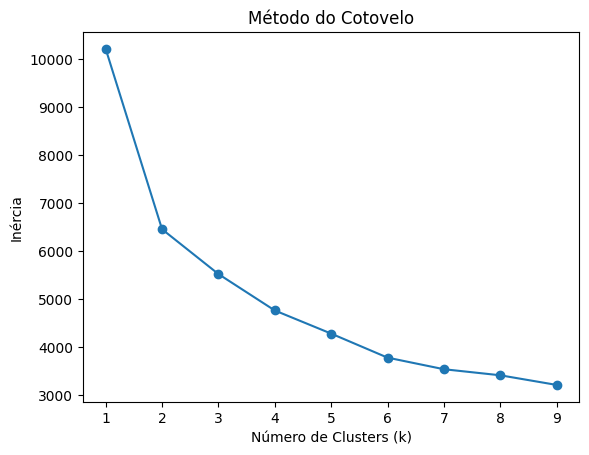

In [18]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [19]:
# Estatísticas médias por cluster
cluster_stats = meia_ofensivo.groupby('Cluster')[['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos',]].mean()
cluster_stats['Jogadores'] = meia_ofensivo['Cluster'].value_counts()
print(cluster_stats)

                xG       xAG       G-PK  Assistencias        PrgC        PrgP  \
Cluster                                                                         
0         8.428767  6.453425   8.493151      6.863014  111.780822  106.219178   
1         3.952941  3.220588   3.838235      3.051471   61.441176   65.852941   
2        11.410989   3.00989  10.736264      3.406593   34.285714   49.813187   
3         4.561818      5.48   4.127273      5.872727   56.890909  188.145455   
4         1.908784  1.883784   1.621622      1.790541   28.601351  121.851351   
5             2.32  1.174118   1.870588      1.075294   18.882353   37.176471   

          Key_Pass  Passing 1/3       Cross  Dribles_Tentados  Dribles_certos  \
Cluster                                                                         
0        51.383562    55.219178  101.315068        122.452055       53.219178   
1        28.102941    36.963235   58.507353         68.536765       29.154412   
2        23.967033    28.58

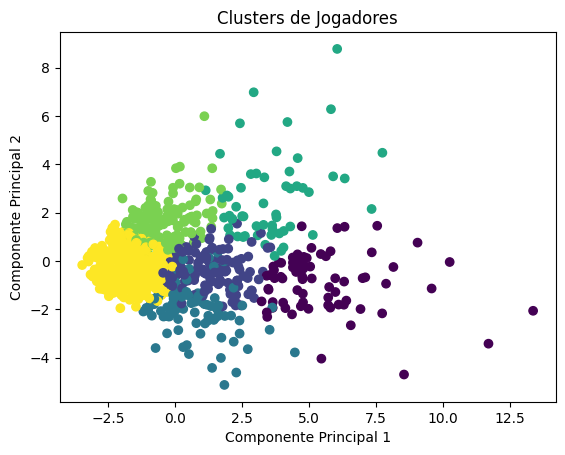

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [20]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = filtered_data.select_dtypes(include=np.number).columns
correlation_matrix = filtered_data[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                       age  Playing Time_Min  Progression_PrgR  Expected_xG  \
age               1.000000          0.053259         -0.055539     0.072181   
Playing Time_Min  0.053259          1.000000          0.475298     0.442821   
Progression_PrgR -0.055539          0.475298          1.000000     0.639605   
Expected_xG       0.072181          0.442821          0.639605     1.000000   
Expected_xAG      0.020236          0.526905          0.742076     0.495534   
Performance_G-PK  0.020492          0.439726          0.637814     0.893984   
Performance_Ast   0.043588          0.492939          0.659160     0.473532   
Progression_PrgC -0.143003          0.502960          0.829524     0.376949   
Progression_PrgP  0.098966          0.662495          0.183706     0.038033   
Performance_Crs   0.085970          0.366251          0.521319     0.124143   
Take-Ons_Att     -0.243877          0.471838          0.768889     0.394153   
Take-Ons_Succ    -0.239273          0.468097        

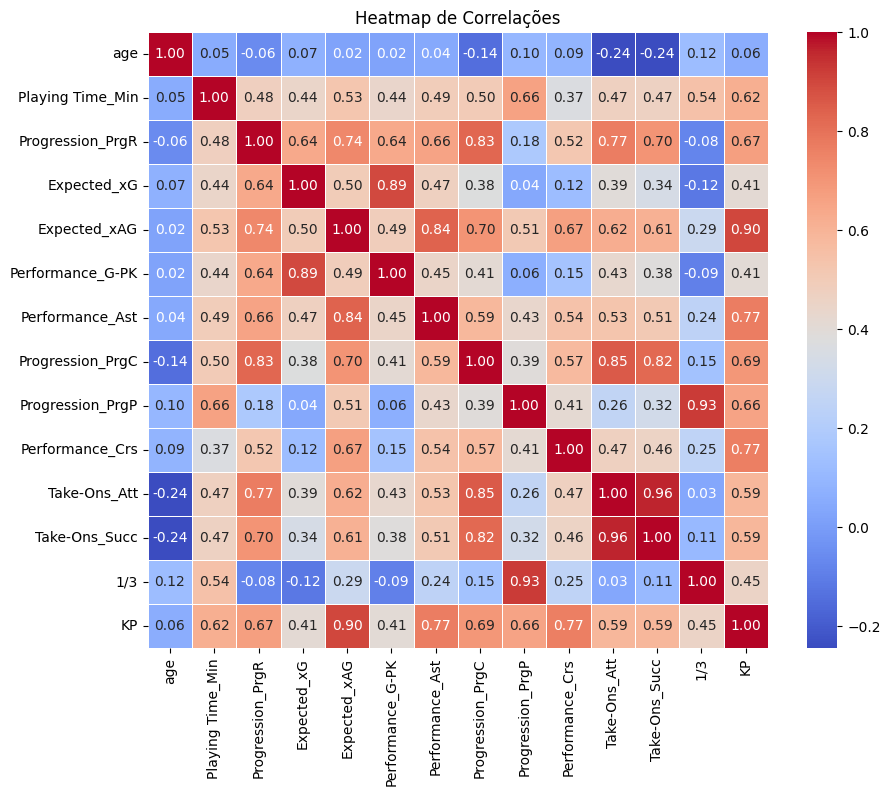

In [21]:
plt.figure(figsize=(10, 8))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()

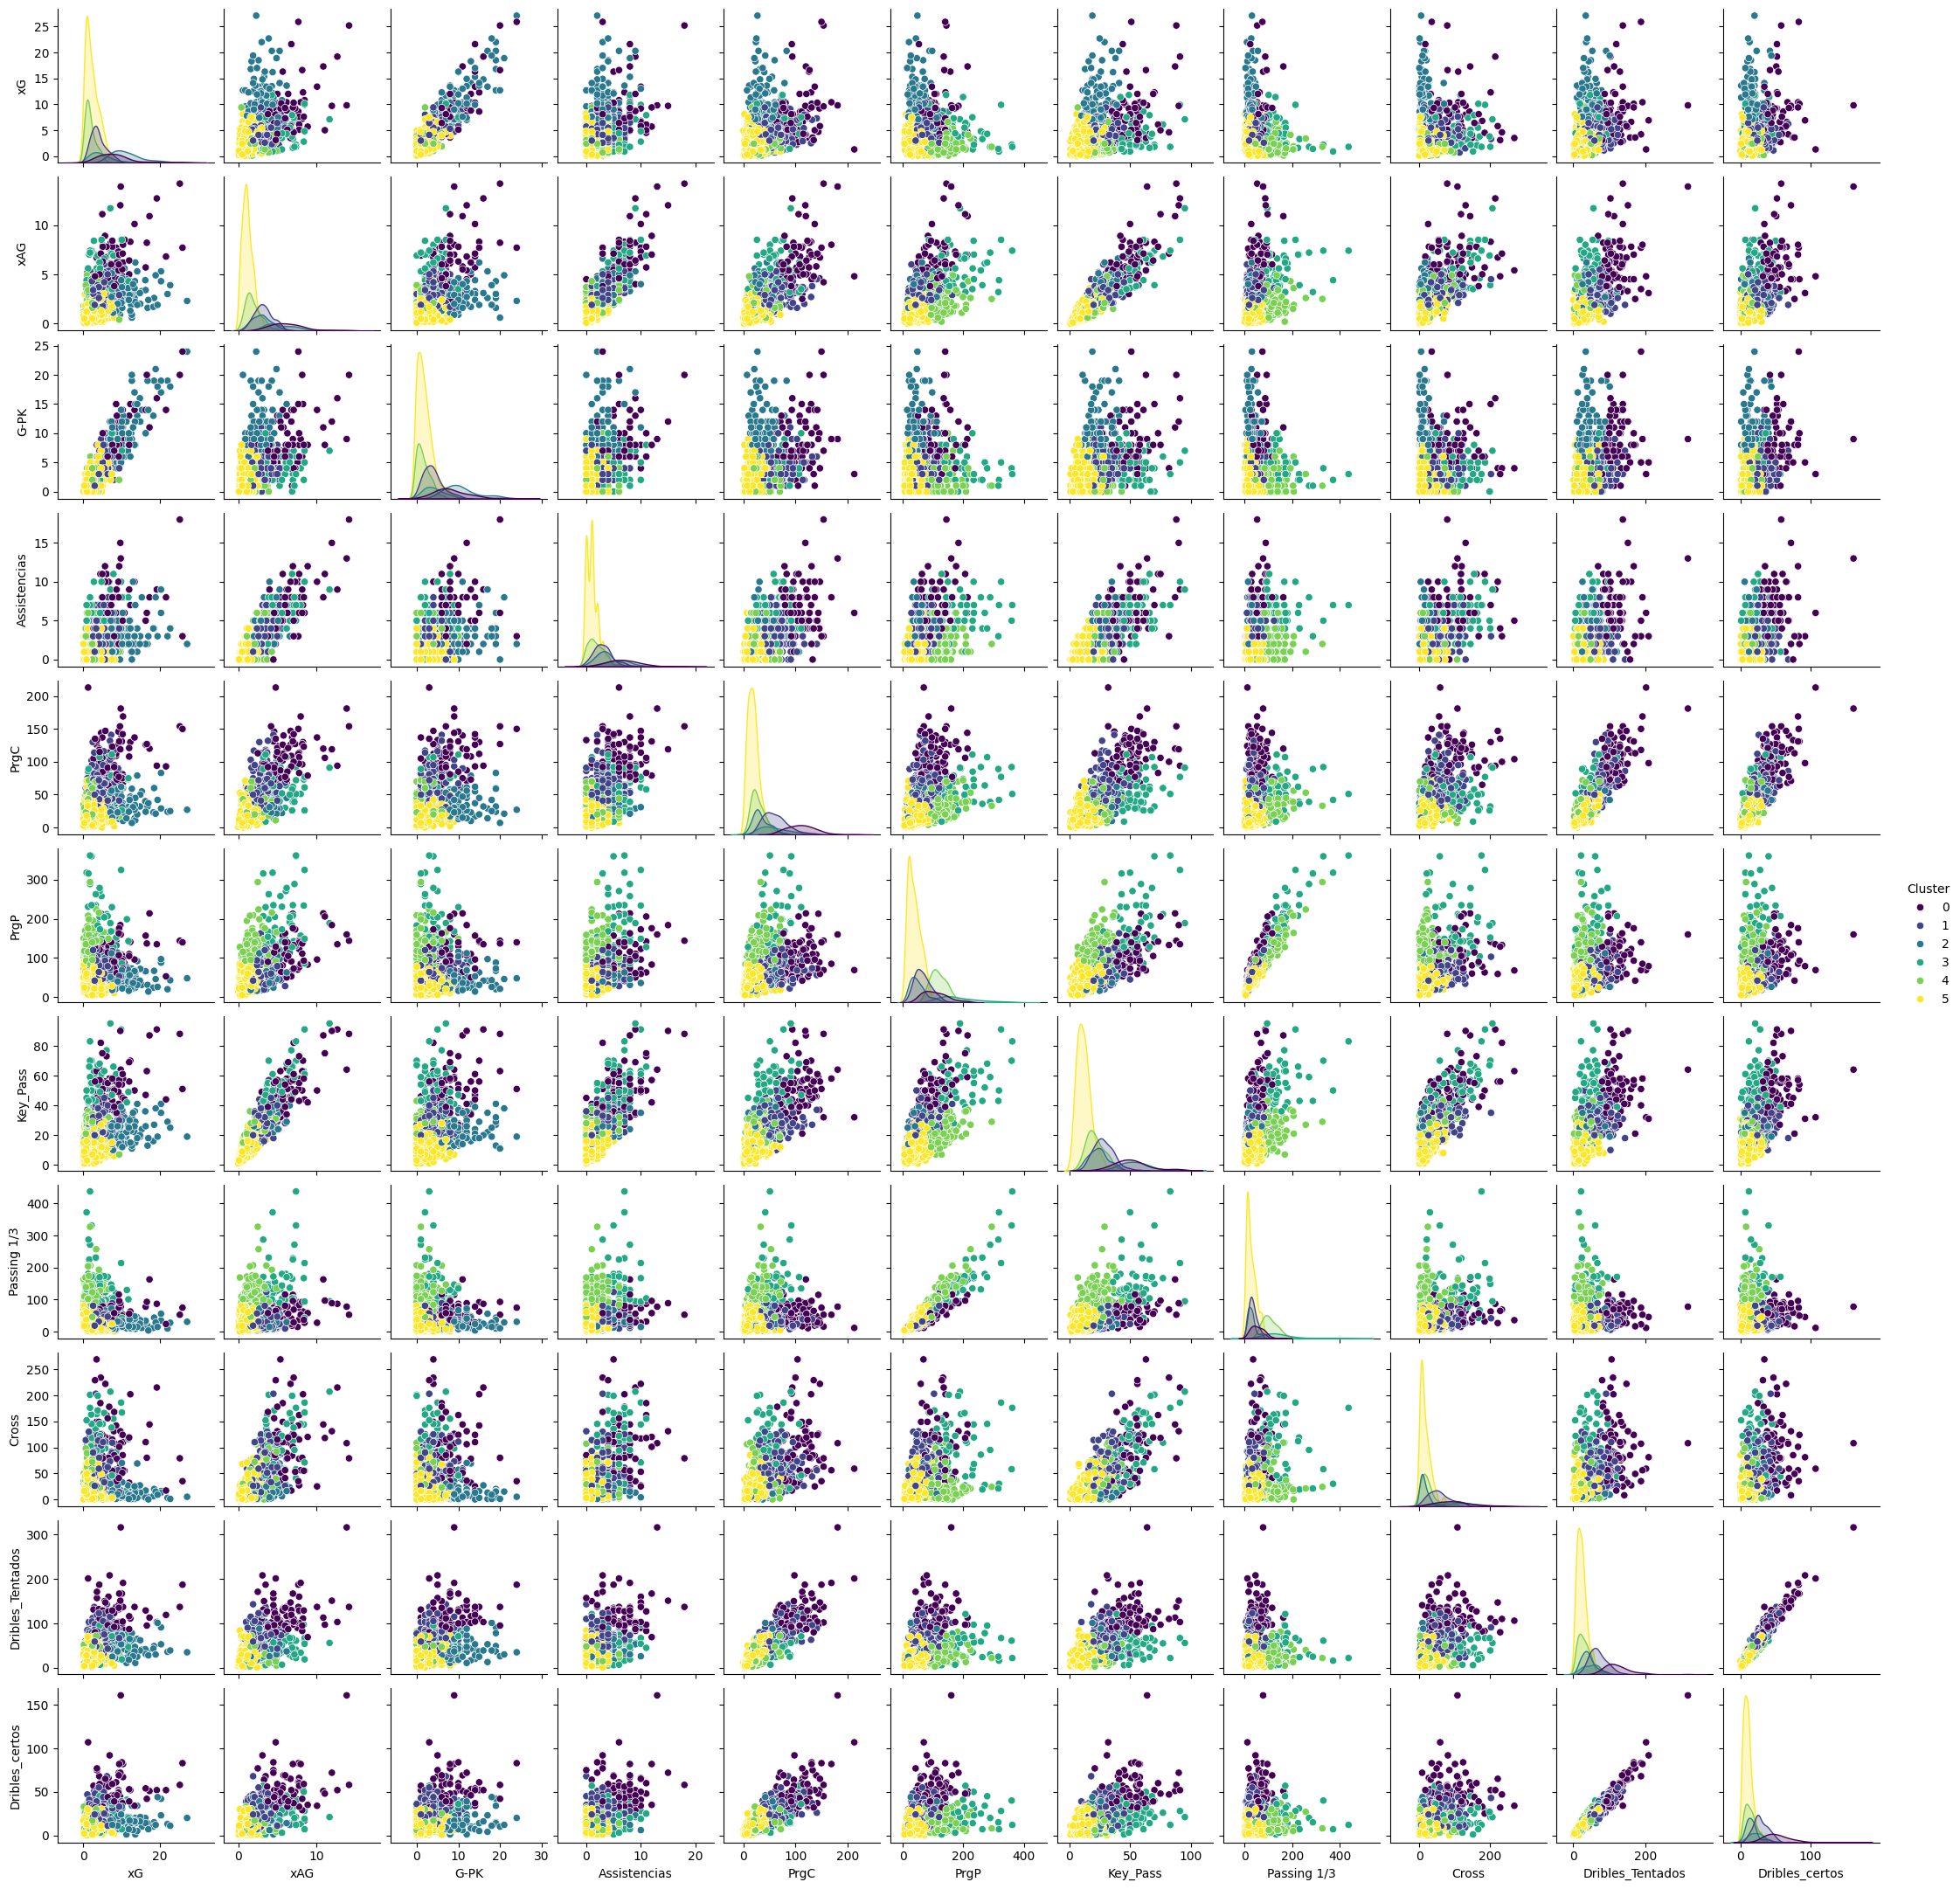

In [22]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(meia_ofensivo[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()

### **Comportamento de Variáveis e Distribuição de Clusters para Meias Ofensivos**

---

### **1. Análise de Correlações**

Claro! Com base no padrão que você usou para os goleiros, aqui está uma **Análise de Correlação para Meias Ofensivos das Top 5 Ligas Europeias (2024)**, considerando os dados das imagens que você enviou:

---

### 🎯 Análise de Correlação – Meias Ofensivos das Top 5 Ligas (2024)

A matriz de correlação abaixo explora como os meias ofensivos das principais ligas europeias se comportam nas dimensões criativas, progressivas e de participação no jogo. Abaixo, os principais insights:

---

### 🧱 Correlações Fortes Positivas

**Expected\_xAG ↔ Performance\_Ast / KP / Progression\_PrgrC**
📈 Meias com alto volume de **assistências esperadas** também entregam:

* Mais **assistências reais** (`Performance_Ast`: 0.84),
* Maior número de **passes-chave** (`KP`: 0.77),
* Maior contribuição em **passes progressivos curtos** (`Progression_PrgrC`: 0.84).
  👉 Um perfil claro de armador central: jogadores com visão, precisão e papel criativo decisivo.

---

**Performance\_Crs ↔ Crosses / KP / Ast**
📨 Meias com alta performance em cruzamentos (`Performance_Crs`) também estão altamente correlacionados com:

* Mais **assistências reais** (`0.54`),
* Mais **passes-chave** (`0.77`),
* Maior participação ofensiva na zona de ataque.
  🔁 Esses meias tendem a atuar abertos ou se projetar para cruzamentos mais avançados.

---

**Take-Ons\_Att ↔ Take-Ons\_Succ**
⚡ A quantidade de **dribles tentados** se alinha fortemente com os **dribles bem-sucedidos** (`0.96`).
👉 Quanto mais o meia tenta driblar, maior sua taxa de sucesso — indicando que dribladores natos tendem a manter uma boa eficiência.

---

**Progression\_PrgrP ↔ PrgrR / PrgrC**
🔗 Meias que progridem com passes também participam da progressão por recepção e por carregadas — ou seja, são **envolvidos em múltiplas fases da construção ofensiva**.

---

### 📉 Correlações Fortes Negativas

**Take-Ons\_Success ↔ Age**
📉 Jogadores mais velhos tendem a ter menor eficiência nos dribles.
👉 Indício de **queda de explosão e agilidade com a idade**, afetando o 1x1.

---

**Expected\_xAG ↔ Age** (correlação fraca mas negativa)
🔽 Há um leve declínio na geração de assistências esperadas com a idade.
👉 Meias mais jovens tendem a arriscar mais e participar mais ativamente da criação de chances.

---

Esse panorama revela **dois grandes arquétipos de meias ofensivos**:

1. **Playmakers construtores**, com alta capacidade de progressão, passes-chave e assistências.
2. **Dribladores incisivos**, que desequilibram no mano a mano e criam superioridade com jogadas individuais.

Ambos os perfis coexistem, com variações por idade e estilo tático do time. Os clusters confirmam essa segmentação.

---


---

### **2. Perfis dos Clusters**

---

Os jogadores foram agrupados em **6 clusters** com base em métricas ofensivas relacionadas à criação de jogadas, finalizações e participação em passes e dribles. Abaixo, a descrição de cada grupo com base nos gráficos de dispersão e densidade.

---

Perfeito, agora com a imagem que mostra as **médias por variável em cada cluster**, é possível refinar os perfis com maior precisão e base quantitativa. Vamos analisar:

---

## 📊 Perfis dos Clusters – Meias Ofensivos (Top 5 Ligas Europeias)

A análise considera as seguintes métricas ofensivas:

* **xG** (Gols esperados)
* **xAG** (Assistências esperadas)
* **G-PK** (Gols sem pênaltis)
* **Assistências**
* **PrgC / PrgP** (Conduções/Passes progressivos)
* **Key Pass, Passing 1/3, Cross, Dribles Tentados e Certos**

---

### 🟣 Cluster 0 – **Criadores de Elite com Protagonismo Total**

📈 **Destaques**:

* 2º maior xG (8.42), 2º em xAG (6.45), maior número de **crosses (101)** e **dribles tentados (122.4)**
* Excelentes números em **Assistências (6.86)**, **Key Passes (51)** e **passes no último terço**

🔎 **Resumo**: Meias ofensivos com volume altíssimo de ações ofensivas. São protagonistas absolutos, participando de jogadas de criação, cruzamentos, dribles e finalizações.
👤 Provável perfil de **meias-armadores centrais ou alas de muita influência**.

---

### 🟢 Cluster 1 – **Dribladores Verticais e Diretos**

📈 **Destaques**:

* Bom volume de **xG (3.95)** e **G-PK (3.83)**
* Acima da média em **Dribles Tentados (68.5)** e **Dribles Certos (29.1)**
* Médias intermediárias de assistências e passes progressivos

🔎 **Resumo**: Jogadores que partem para cima, com boa capacidade de drible e finalização. São incisivos, com menos foco em passes complexos, mas úteis no desequilíbrio individual.
👤 Perfil de **pontas ofensivos ou meias agudos**.

---

### 🔵 Cluster 2 – **Finalizadores e Meias Completos**

📈 **Destaques**:

* **Maior xG (11.41)** e **G-PK (10.73)**
* Bons valores em **Assistências (3.4)**, **xAG (3.0)** e **Dribles Certos (16.2)**
* Menor número de passes no último terço (28.5) e cruzamentos (14.9)

🔎 **Resumo**: Meias ofensivos ou atacantes que jogam por dentro e têm foco claro na finalização. Finalizam muito, mas também criam em certa medida.
👤 Perfil de **segundo atacante ou meia-atacante de área**.

---

### 🟡 Cluster 3 – **Equilibrados de Construção e Passes Progressivos**

📈 **Destaques**:

* **Maior xAG (5.48)**, 2º em **Assistências (5.87)**
* **Melhor em PrgP (188.1)** e alto em **Passing 1/3 (110)**
* Baixo em Dribles e xG

🔎 **Resumo**: Jogadores que participam muito da **circulação e construção**, com foco em **passes progressivos** e **assistências**. Pouco envolvidos em dribles ou finalizações.
👤 Perfil de **meias organizadores ou segundo volante com boa distribuição**.

---

### 🟤 Cluster 4 – **Apoiadores com Boa Distribuição**

📈 **Destaques**:

* Intermediários em tudo, com destaque em **PrgP (121.8)** e **Passing 1/3 (110)**
* Baixos em xG (1.90), xAG (1.88) e Assistências (1.79)

🔎 **Resumo**: Jogadores que fazem bem o papel de apoio na criação. Não são decisivos, mas importantes para manter a posse e organizar.
👤 Perfil de **meias auxiliares ou jogadores táticos**.

---

### 🟣💙 Cluster 5 – **Baixo Impacto Ofensivo / Reservas ou Defensivos**

📉 **Destaques Negativos**:

* **Menor xG (2.32), xAG (1.17), G-PK (1.87), Assistências (1.07)**
* Menores valores em praticamente todas as métricas

🔎 **Resumo**: Jogadores com pouca ou nenhuma influência ofensiva. Provavelmente atuam menos minutos ou jogam em funções mais defensivas.
👤 Perfil de **reservas, meias de contenção ou jogadores pouco utilizados**.

---


In [46]:
cluster_names = {
    0: 'mei armador',
    1: 'mei vertical',
    2: 'mei completo',
    3: 'mei regista',
    4: 'mei apoio',
    5: 'mei sr',
}

# Adicionar nomes ao DataFrame
meia_ofensivo['Perfil'] = meia_ofensivo['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(meia_ofensivo[['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos','Perfil']].head())

    xG  xAG  G-PK  Assistencias  PrgC  PrgP  Key_Pass  Passing 1/3  Cross  Dribles_Tentados  Dribles_certos        Perfil
1  6.8  7.6     5            10    96    70        58           15    117                90              41   mei armador
3  3.5  6.6     4             7    90   192        59          137    164                29              14   mei regista
4  1.2  1.2     4             2    46    33        16           17     54                62              37  mei vertical
5  3.0  0.7     3             0    15    19         8           10      7                22               9        mei sr
7  7.4  5.0     8             4   124    52        40           11     92               109              33   mei armador


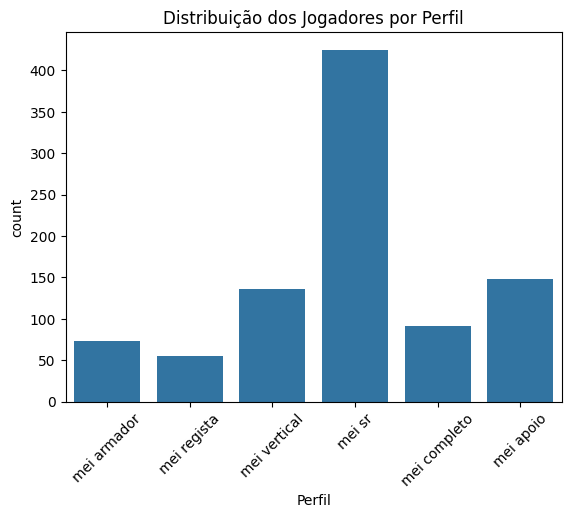

In [47]:
sns.countplot(data=meia_ofensivo, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()

In [32]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = meia_ofensivo[meia_ofensivo['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao', 'Minutos','xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "mei armador"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)


Jogadores no perfil: mei armador
                 jogador         time posicao  Minutos    xG  xAG  G-PK  Assistencias  PrgC  PrgP  Key_Pass  Passing 1/3  Cross  Dribles_Tentados  Dribles_certos
1            Bukayo Saka      Arsenal   FW,MF     1729   6.8  7.6     5            10    96    70        58           15    117                90              41
7     Gabriel Martinelli      Arsenal   FW,MF     2290   7.4  5.0     8             4   124    52        40           11     92               109              33
13      Leandro Trossard      Arsenal      FW     2546   7.2  6.1     8             7    80   101        41           45     86                86              38
46         Morgan Rogers  Aston Villa   FW,MF     3114   6.6  7.8     8            10   114   123        51           73     27               160              66
55       Antoine Semenyo  Bournemouth      FW     3203  10.0  5.8    11             5   140   109        46           49     59               135           

In [48]:
# Dicionário dos peso para cada métrica
pesos = {
    'xG': 1.1,
    'xAG': 1.85,
    'G-PK': 1.80,
    'Assistencias': 2,
    'Acoes Ofensivas': 1.2,
    'Key_Pass': 1.5,
    'Passing 1/3': 1.1,
    'Cross': 1.0,
    '%Dribles': 1.25
}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    # Verifica se a coluna é numérica antes de normalizar
    if pd.api.types.is_numeric_dtype(coluna):
        return coluna / coluna.max()
    else:
        # Se a coluna não for numérica, converte para numérica
        # (ignorando erros para valores não numéricos)
        return pd.to_numeric(coluna, errors='coerce') / pd.to_numeric(coluna, errors='coerce').max()

# Normalizando 'Acoes Ofensivas' e 'Dribles'
meia_ofensivo['Acoes Ofensivas'] = normalizar(meia_ofensivo['Acoes Ofensivas']) * 100
meia_ofensivo['%Dribles'] = normalizar(meia_ofensivo['%Dribles']) * 100

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    meia_ofensivo[coluna + '_Pontuacao'] = meia_ofensivo[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
meia_ofensivo['Pontuacao_Total'] = meia_ofensivo[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = meia_ofensivo['Pontuacao_Total'].min()
max_pontuacao = meia_ofensivo['Pontuacao_Total'].max()
meia_ofensivo['Pontuacao'] = (
    (meia_ofensivo['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'mei regista'
jogadores_filtrados = meia_ofensivo[meia_ofensivo['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: mei regista
 Ranking            time posicao               jogador      Perfil  Pontuacao
       1   Bayern Munich      MF        Joshua Kimmich mei regista      100.0
       2  Manchester Utd      MF       Bruno Fernandes mei regista  77.377286
       3       Barcelona      MF                 Pedri mei regista  72.996218
       4      Leverkusen      MF          Granit Xhaka mei regista  68.167029
       5       Stuttgart      MF        Angelo Stiller mei regista  64.347481
       6      Villarreal   MF,FW            Alex Baena mei regista  62.874864
       7     Aston Villa      MF       Youri Tielemans mei regista  60.810536
       8   Werder Bremen      MF         Romano Schmid mei regista  60.618546
       9     Montpellier      MF         Téji Savanier mei regista  60.129504
      10     Real Madrid      MF           Luka Modrić mei regista  59.806092
      11        Mainz 05      MF          Nadiem Amiri mei regista  59.256374
      12       Bren

In [34]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'mei vertical'  # Defina o perfil desejado
jogadores_filtrados = meia_ofensivo[meia_ofensivo['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))

Jogadores disponíveis no perfil 'mei vertical': ['Ethan Nwaneri', 'Jacob Ramsey', 'John McGinn', 'Leon Bailey', 'Dango Ouattara', 'Georginio Rutter', 'João Pedro', 'Simon Adingra', 'Yankuba Minteh', 'Yasin Ayari', 'Jadon Sancho', 'Abdoulaye Doucouré', 'Dwight McNeil', 'Iliman Ndiaye', 'Jack Harrison', 'Jack Clarke', 'Omari Hutchinson', 'Bilal El Khannouss', 'Facundo Buonanotte', 'Jordan Ayew', 'Stephy Mavididi', 'Cody Gakpo', 'Phil Foden', 'Alejandro Garnacho', 'Harvey Barnes', 'Callum Hudson-Odoi', 'Kamaldeen Sulemana', 'Mateus Fernandes', 'Tyler Dibling', 'Jean-Ricner Bellegarde', 'Giuliano Simeone', 'Fermin López', 'Abde Ezzalzouli', 'Antony', 'Alfon', 'Jofre', 'Christantus Uche', 'Arnaut Danjuma', 'Bryan Gil', 'Viktor Tsyhankov', 'Yaser Asprilla', 'Sandro Ramírez', 'Dani Raba', 'Juan Cruz', 'Óscar Rodríguez Arnaiz', 'Dani Rodríguez', 'Roberto Navarro', 'Aimar Oroz', 'Adri Embarba', 'Jorge de Frutos', 'Álvaro García', 'Arda Güler', 'Brahim Díaz', 'Ander Barrenetxea', 'Chidera Ejuke'


Jogadores selecionados: Andreas Pereira, Mateus Fernandes, Dani Olmo, Pedri, Gaëtan Perrin, Téji Savanier, Vitinha, Vitinha
       xG  xAG  G-PK  Assistencias  Acoes Ofensivas  Key_Pass  Passing 1/3  Cross  Dribles_certos  Minutos
228   3.8  4.6     2             4        29.424779        57           67    171              14     2013
469   4.0  3.0     2             4        48.893805        34           98    113              49     2909
661   6.5  3.0     8             3        25.221239        26           49     21              23     1212
680   2.2  7.4     4             5            100.0        70          331     58              40     2879
1216  6.1  7.8    10            11        49.778761        73           87    162              60     2691
1476  3.8  6.9     0             5        46.238938        67          165    199              27     2363
1566  3.4  2.6     3             1        61.283186        27          257     21              27     2042
2452  1.6  3.3     

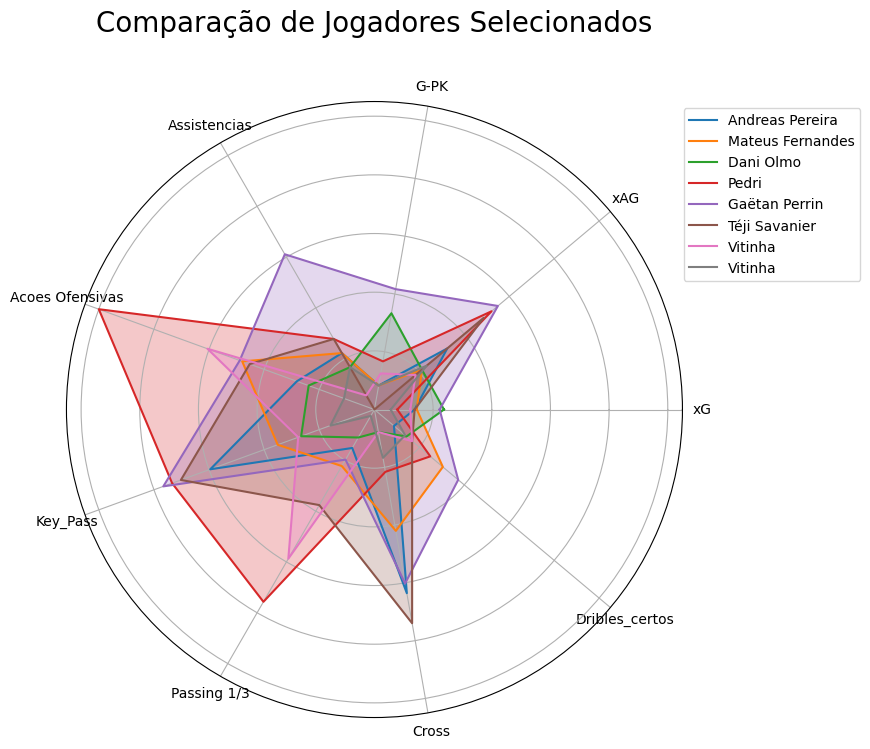

In [50]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Key_Pass','Passing 1/3','Cross','Dribles_certos','Minutos']])

    # Definir as métricas a serem exibidas no radar
    metricas = ['xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Key_Pass','Passing 1/3','Cross','Dribles_certos']
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Dani Olmo', 'Vitinha','Pedri','Mateus Fernandes','Gaëtan Perrin','Téji Savanier','Andreas Pereira']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, meia_ofensivo)